In [1]:
import skbio
import seaborn

# Coronavirus


Complete genome -> https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta

In [2]:
def parseFASTA(file):
	sequence = ""
	for line in file:
		if line.startswith(">"):
			continue
		sequence+=line.strip()

	return sequence


file = open("coronavirus.txt", 'r')
coronavirus = parseFASTA(file)
coronavirus[:100]

'ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC'

### Number of base pairs

In [3]:
len(coronavirus)

29903

### Adenine, Cytosine, Guanine, and Thymine

In [4]:
print("A:", coronavirus.count("A"))
print("C:", coronavirus.count("C"))
print("G:", coronavirus.count("G"))
print("T:", coronavirus.count("T"))

A: 8954
C: 5492
G: 5863
T: 9594


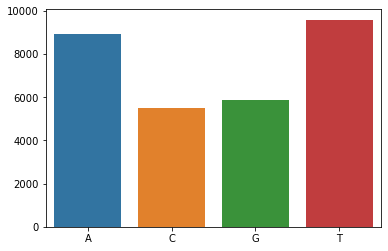

In [5]:
seaborn.barplot(["A", "C", "G", "T"], [8954, 5492, 5863, 9594]);

### El "programa" (síntesis de proteínas) realmente empieza en el primer ATG (AUG en ARN)

In [6]:
print("number of ATGs:", coronavirus.count("ATG"))

number of ATGs: 725


# Coronavirus RNA

In [7]:
coronavirus_rna = coronavirus.replace("T", "U")
coronavirus_rna[:100]

'AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUC'

In [8]:
# the following sequence is NCBI reference sequence NM_005368.3
protein = skbio.DNA(coronavirus).translate(stop='require')
protein

Protein
--------------------------
Stats:
    length: 8
    has gaps: False
    has degenerates: False
    has definites: True
    has stops: False
--------------------------
0 IKGLYLPR

In [9]:
print(protein)

IKGLYLPR


In [17]:
import Bio
from Bio import SeqIO

In [4]:
coronavirus = SeqIO.parse(open("coronavirus.txt"), 'fasta')

In [5]:
coronavirus

<generator object parse at 0x7f6578e62660>